In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import Imputer
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Loading data file
pima_df = pd.read_csv('D:\Sumant Data\MySQL\AIML\Feature selection\pima-indians-diabetes.csv')

In [4]:
pima_df.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Replacing all the missing values with NaN
pima_df[['Plas','Pres','skin','test','mass','pedi','age']]=pima_df[['Plas','Pres','skin','test','mass','pedi','age']].replace(0,np.nan)

In [33]:
pima_df.isnull().sum()

Preg       0
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

In [7]:
#Split the dataset into X & Y
values = pima_df.values
X = values[:,0:8]
Y = values[:,8]

In [8]:
X.shape

(768, 8)

In [9]:
#Impute the missing values with median using imputer
imputer = Imputer()
transformed_x = imputer.fit_transform(X)
#transformed_x = Imputer(missing_values='NaN',strategy='median',axis = 0)

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparam

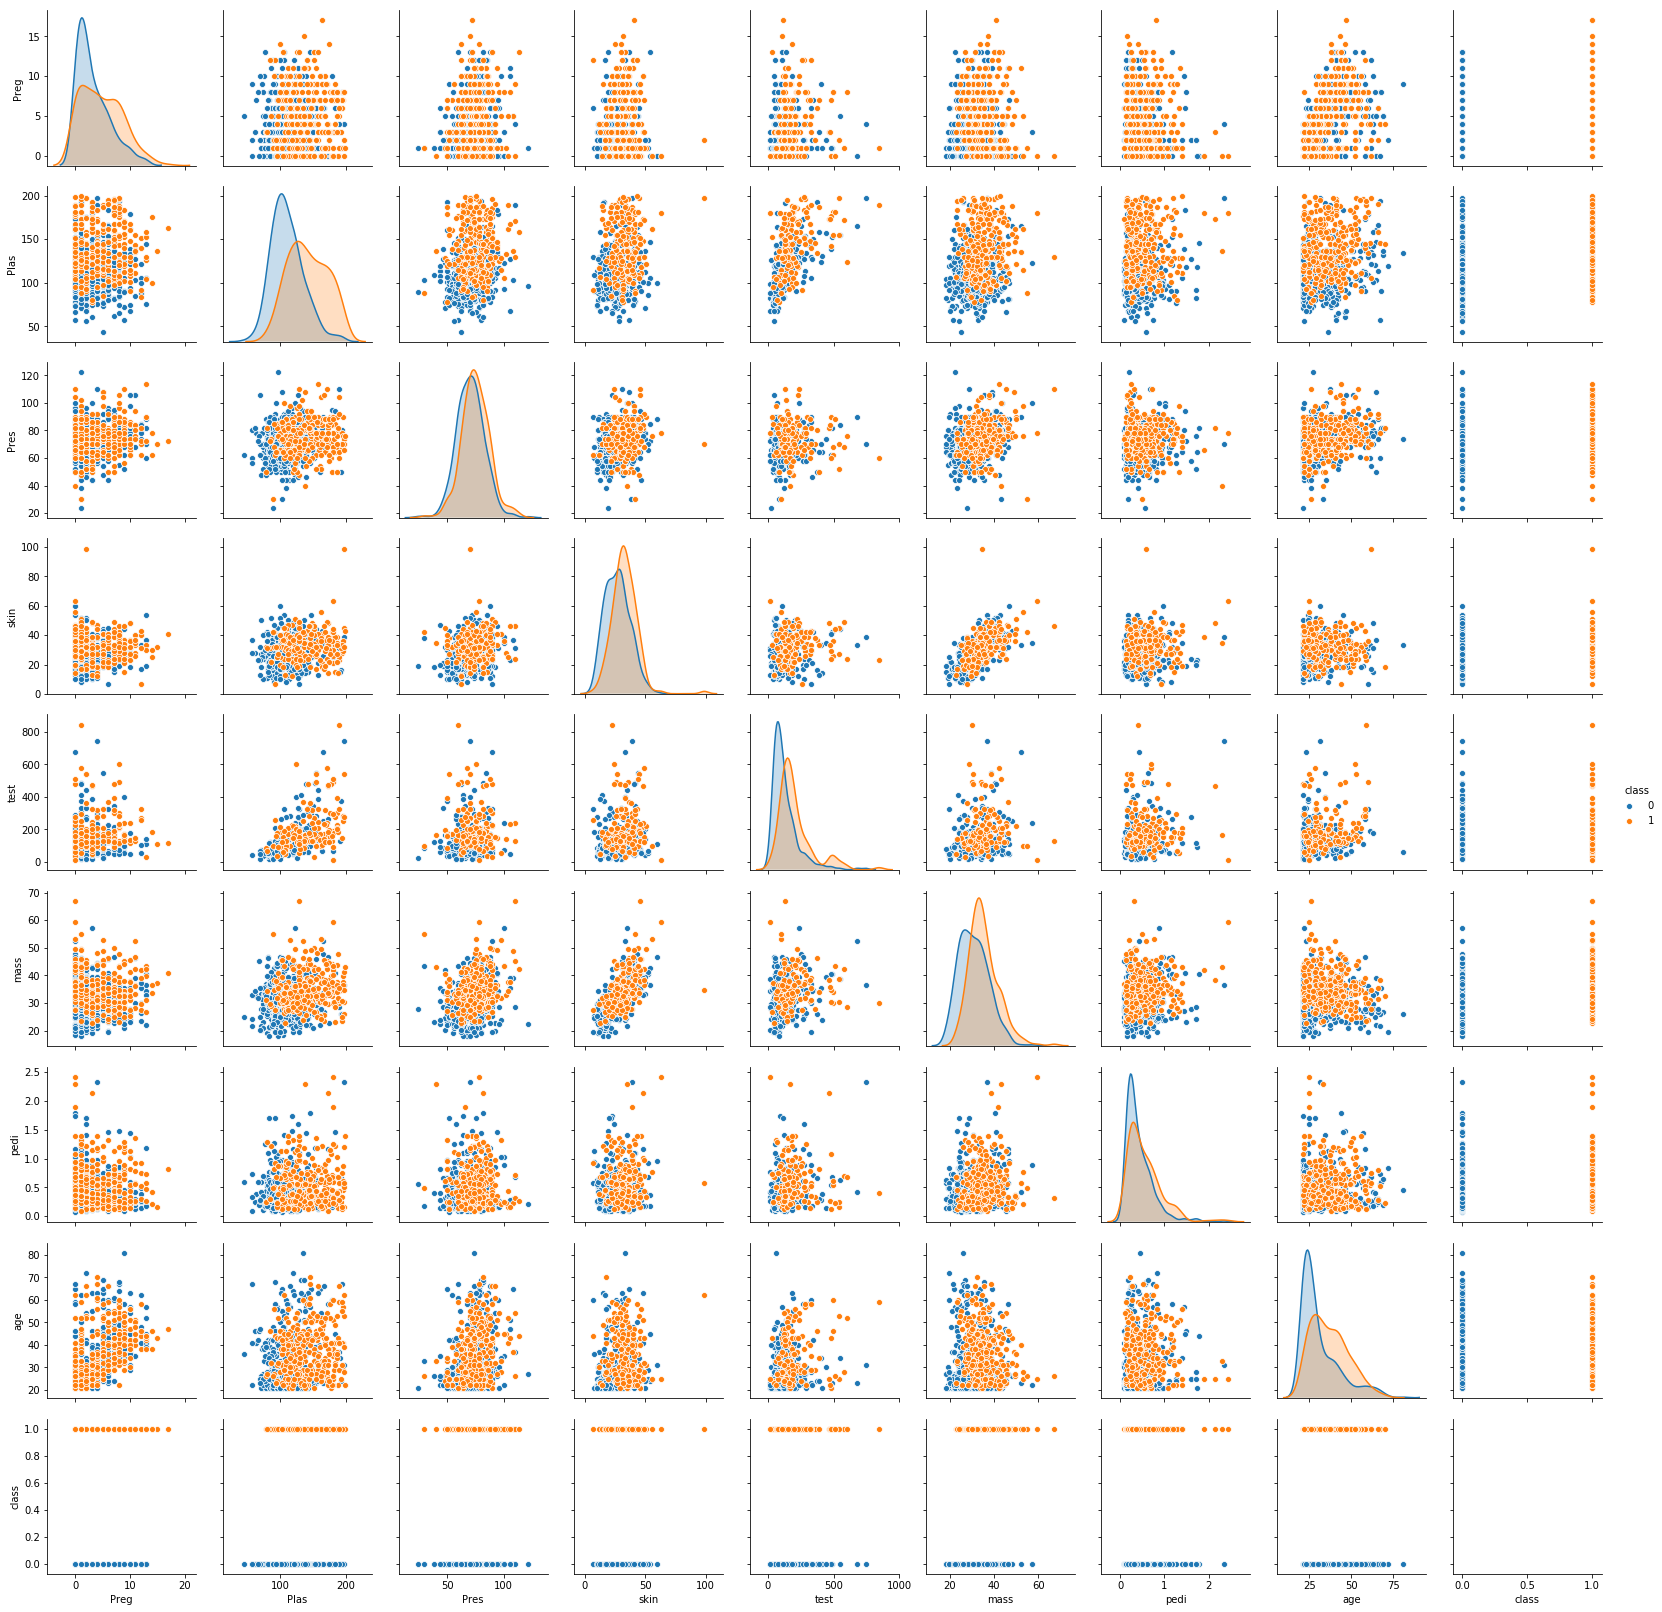

In [10]:
#Creating a pairplot to see the variable distribution
sns.pairplot(pima_df,diag_kind='kde',hue='class')

In [11]:
#Applying Decision Tree Classifier
#x_train,x_test,y_train,y_test = train_test_split(transformed_x,Y,test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(transformed_x, Y, test_size=0.3, random_state=1)
dt_model = DecisionTreeClassifier(criterion='entropy')


In [12]:
#Fitting the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
dt_model.score(X_test,y_test)
y_predict = dt_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predict))

[[118  28]
 [ 27  58]]


In [14]:
#Correct prediction for Diabetes class
50/(35+50)

0.5882352941176471

In [17]:
#Checking feature importance
print(pd.DataFrame(dt_model.feature_importances_,columns= ['Imp'],index= X_train.columns))

In [21]:
#Regularizing the Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
dt_model.score(X_test,y_test)
y_predict = dt_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predict))

[[126  20]
 [ 25  60]]


In [23]:
60/(25+60)

0.7058823529411765

In [ ]:
##################################################Feature Engineering############################

In [24]:
#AUTO MPG DATASET FOR FEATURE ENGINEERING & MODEL TUNING USING CLUSTERING & PCA

In [90]:
#STEP 1: DOWNLOADING PACKAGES NUMPY, SEABORN, PANDAS, MATPLOTLIB, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [26]:
auto_df = pd.read_csv('D:\Sumant Data\MySQL\AIML\Feature selection\car-mpg.csv')

In [27]:
auto_df.head(50)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


In [28]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [29]:
auto_df['hp'].unique()
#There are ? mark in the data

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [30]:
#replacing all '?' with np.nan
auto_df = auto_df.replace('?',np.nan)

In [54]:
auto_df.isnull().sum()
#There are missing values only in hp column

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [47]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_type    398 non-null int64
car_name    398 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


In [44]:
#Changing data type from object to float
auto_df['hp']=auto_df['hp'].astype('float64')

In [53]:
#Treatment of missing value
auto_df['hp'].fillna(auto_df['hp'].median(),inplace = True)

In [55]:
#Creating a copy of the data frame
new_df = auto_df.copy()

In [56]:
new_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,ford torino


In [58]:
new_df['dispercyl'] = new_df['disp']/new_df['cyl']

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


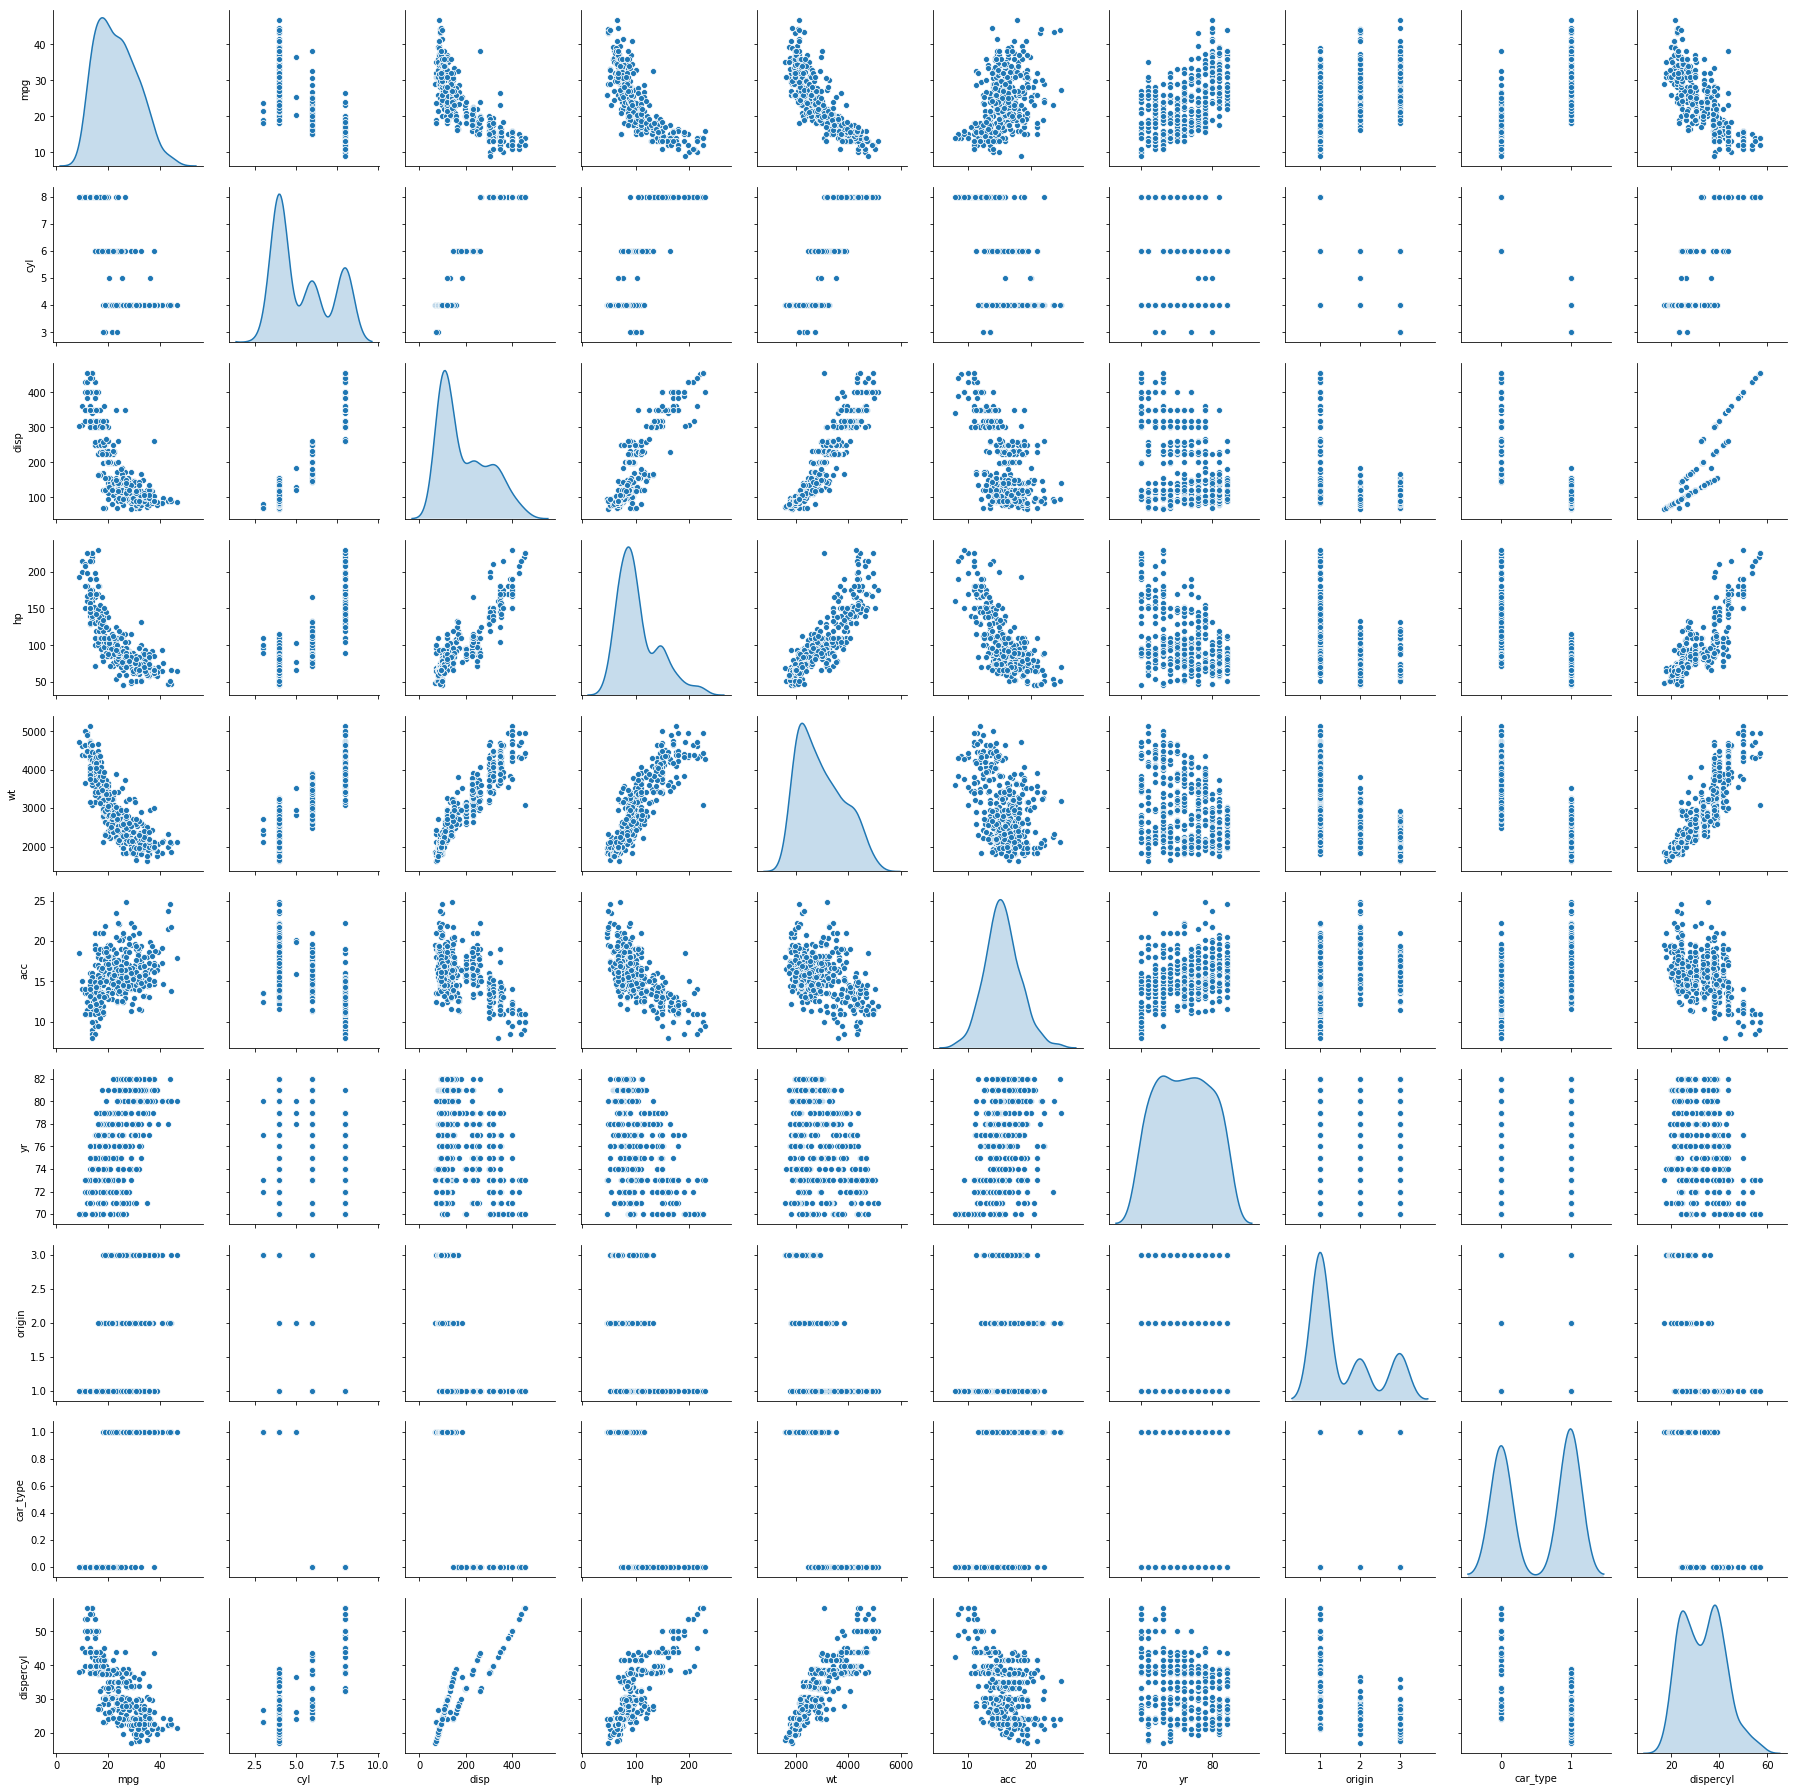

In [59]:
#Creating a pair plot
sns.pairplot(new_df,diag_kind='kde')
#The pair panel suggest the number of cluster could be between 3 to 9

In [61]:
cori = new_df.corr()

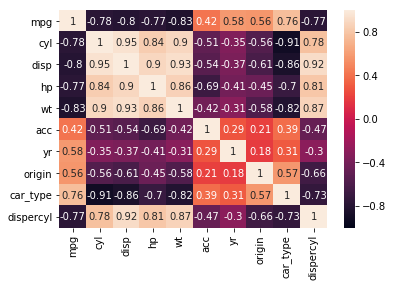

In [64]:
sns.heatmap(data=cori,vmin=-1,annot=True)

In [67]:
#selecting data from mpg tilll origin for model building
new_df_attr = new_df.loc[:,'mpg':'origin']

In [68]:
new_df_attr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [69]:
#scaling the datafraame using Z-score 
from scipy.stats import zscore


In [70]:
new_df_attr_z = new_df_attr.apply(zscore)

In [71]:
array = new_df_attr_z.values

In [74]:
#splitting data into X & Y
X = array[:,1:7]
y = array[:,0]

In [75]:
print(X.shape)
print(y.shape)

(398, 6)
(398,)


In [76]:
#creating train test 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

In [78]:
#Importing Support Vector Regressor
from sklearn import svm
clr = svm.SVR()
clr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
y_pred = clr.predict(x_test)

In [86]:
sns.set(style='darkgrid',color_codes=True)
import scipy.stats as stats

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


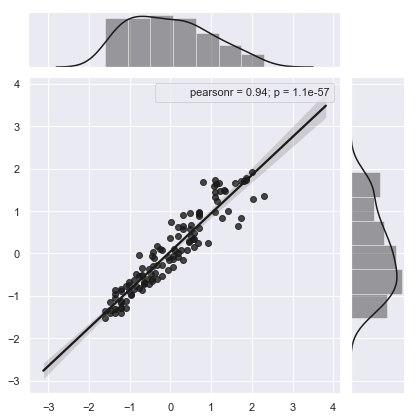

In [87]:
j=sns.jointplot(x = y_test,y=y_pred, kind="reg", color="k")
j.annotate(stats.pearsonr)

In [93]:
cluster_range = range(2,6)
cluster_error = []
for num_clusters in cluster_range:
    cluster = KMeans(num_clusters,n_init=5)
    cluster.fit(new_df_attr)
    labels = cluster.labels_
    centroid = cluster.cluster_centers_
    cluster_error.append(cluster.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_error':cluster_error})
cluster_df[0:15]

,num_clusters,cluster_error
0,2,7.428960e+07
1,3,3.420817e+07
2,4,1.905688e+07
3,5,1.376977e+07


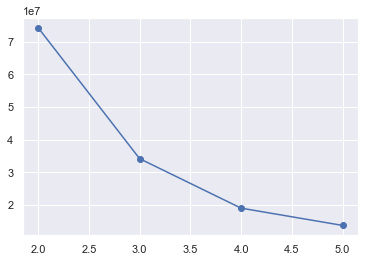

In [101]:
#creating elbow plot for the same
plt.Figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters,cluster_df.cluster_error,marker = 'o')       

In [102]:
#Elbow plot suggest there are 3 clusters
auto_df_attr = auto_df.loc[:,'mpg':'origin']

In [112]:
auto_df_attr.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

In [119]:
auto_df_attr_z = auto_df_attr.apply(zscore)
cluster = KMeans(n_clusters=3,random_state=1)
cluster.fit(auto_df_attr_z)
pred = cluster.predict(auto_df_attr_z)
auto_df_attr_z['Group'] = pred
auto_df_attr_z_copy = auto_df_attr_z.copy(deep=True)

In [120]:
#Extracting Centroids
centroid = cluster.cluster_centers_
centroid

array([[ 0.89844152, -0.81610375, -0.86426529, -0.70547867, -0.86985567,
         0.27002569,  0.31010992,  0.95968268],
       [-0.23301503, -0.12590632, -0.05634295, -0.24639985,  0.02416321,
         0.43720956,  0.08226919, -0.60579879],
       [-1.12726026,  1.4864187 ,  1.46865697,  1.47338845,  1.36736404,
        -1.03371846, -0.61198576, -0.71514478]])

In [113]:
#Creating dataframe and appending with auto df attri
centroid_df = pd.DataFrame(centroid,columns = list(auto_df_attr))

In [114]:
centroid_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,0.898442,-0.816104,-0.864265,-0.705479,-0.869856,0.270026,0.310110,0.959683
1,-0.233015,-0.125906,-0.056343,-0.246400,0.024163,0.437210,0.082269,-0.605799
2,-1.127260,1.486419,1.468657,1.473388,1.367364,-1.033718,-0.611986,-0.715145


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE5E64AA58>,
      dtype=object)

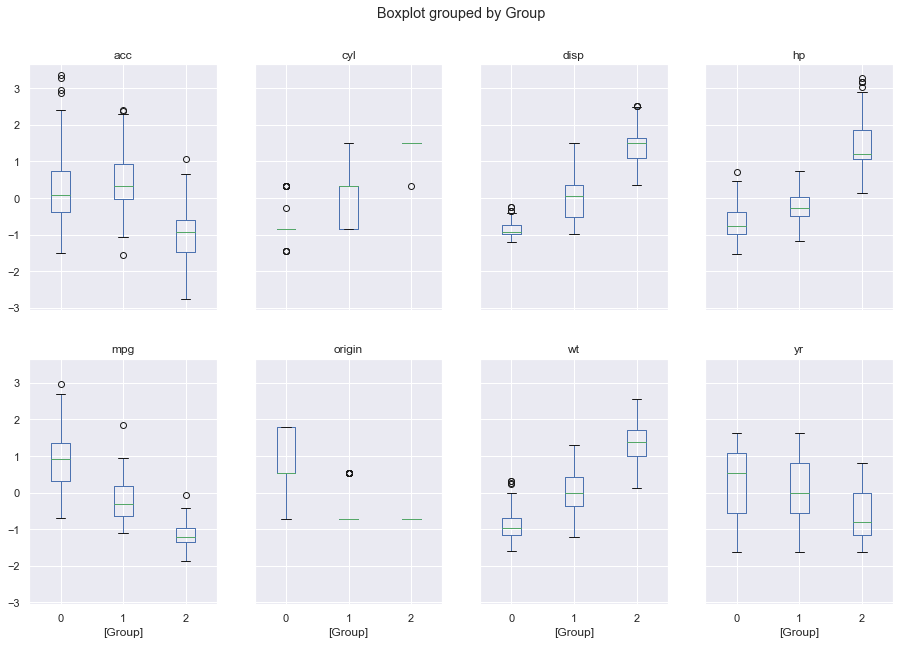

In [121]:
#Doing a visual analysis by plotting boxplot
auto_df_attr_z.boxplot(by = 'Group',  layout=(2,4), figsize=(15, 10))

In [126]:
#There are many outliers in many dimensions, the whiskers are long due to outliers
#if they are treated, the overlap between clusters will get removed
data = auto_df_attr_z
def replace(group):
    median,std = group.median(),group.std()
    outliers = (group-median).abs()>2*std
    group[outliers] = group.median()
    return group

data_correct = (data.groupby('Group').transform(replace))
concat_data = data_correct.join(pd.DataFrame(auto_df_attr_z['Group']))

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [128]:
concat_data.groupby('Group').count()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Group,,,,,,,,
0,161,161,161,161,161,161,161,161
1,137,137,137,137,137,137,137,137
2,100,100,100,100,100,100,100,100


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE5EE029B0>,
      dtype=object)

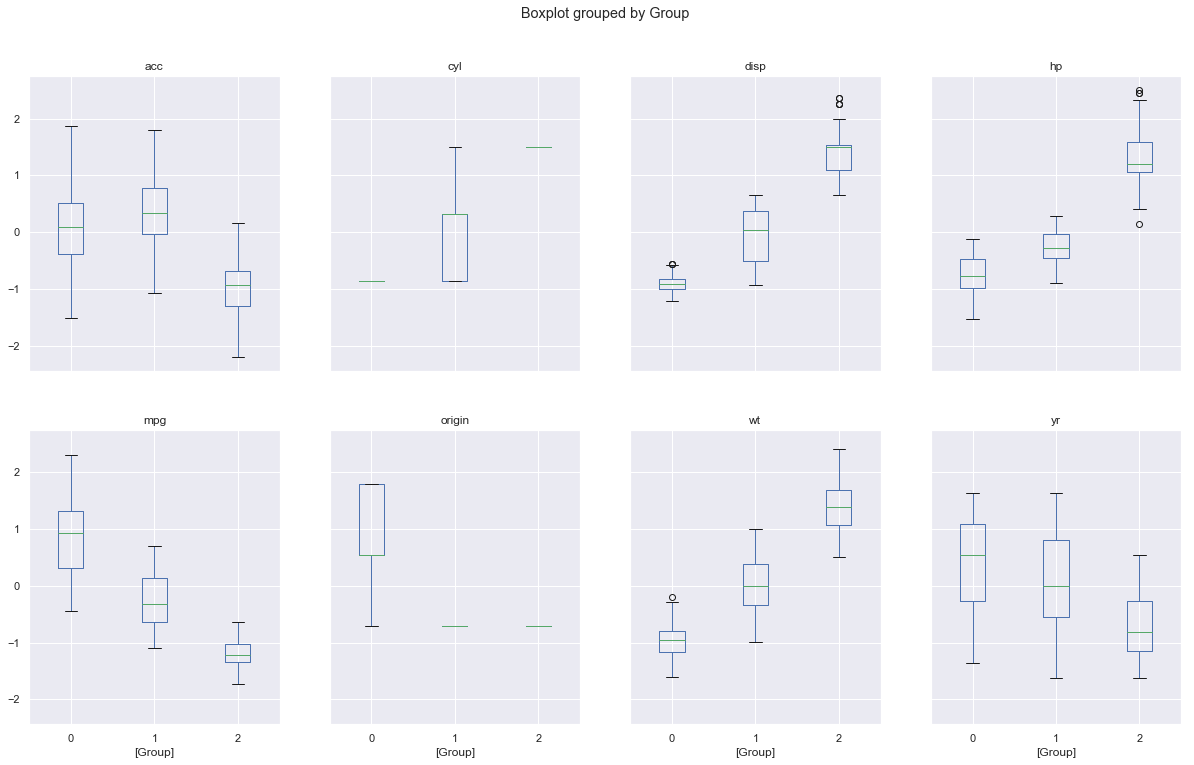

In [130]:
#visualizing the data again, after treatment of outliers, the data distribution has become compact & varience reduced
concat_data.boxplot(by='Group',figsize=(20,12),layout=(2,4))

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


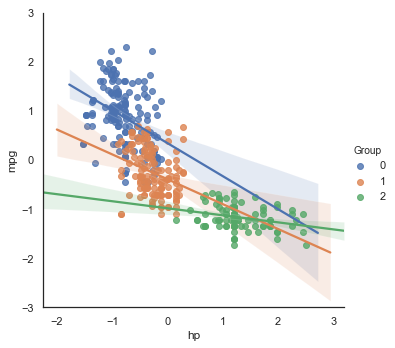

In [131]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


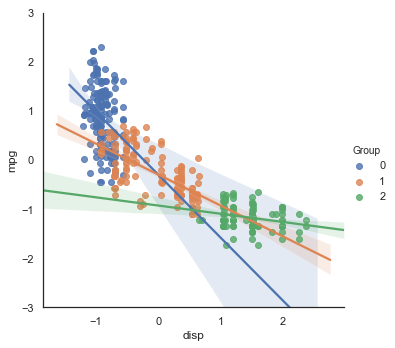

In [132]:
var = 'disp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='Group')
plot.set(ylim = (-3,3))

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


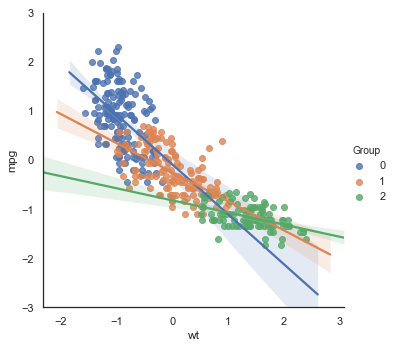

In [138]:
#Even displacement is not a strong predictor for group 2, as the green line is almost || to the axis
#Checking for wt
var = 'wt'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'mpg', data = concat_data,hue = 'Group')
    plot.set(ylim = (-3,3))

In [143]:
#Weight is somewhat a better predictor, in similar way, we check the all the variable using lmplot
#dividing the data set into 3 different group 
small_car = concat_data[concat_data['Group']==0]
Medium_car = concat_data[concat_data['Group']==1]
large_car = concat_data[concat_data['Group']==2]

In [145]:
small_car.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,161.0,0.862079,6.219739e-01,-0.450231,0.318393,0.920482,1.304794,2.304005
cyl,161.0,-0.856321,1.781899e-15,-0.856321,-0.856321,-0.856321,-0.856321,-0.856321
disp,161.0,-0.901960,1.422069e-01,-1.204411,-0.993154,-0.916334,-0.820308,-0.561039
hp,161.0,-0.771537,3.429623e-01,-1.527300,-0.977195,-0.767632,-0.479482,-0.112746
wt,161.0,-0.939342,2.893979e-01,-1.604943,-1.159200,-0.958201,-0.792673,-0.193224
acc,161.0,0.117127,6.985590e-01,-1.513346,-0.387801,0.084201,0.519896,1.863288
yr,161.0,0.404296,9.067854e-01,-1.356642,-0.273506,0.538847,1.080415,1.621983
origin,161.0,0.959683,9.056640e-01,-0.715145,0.533222,0.533222,1.781589,1.781589
Group,161.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000


In [148]:
small_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 14 to 395
Data columns (total 9 columns):
mpg       161 non-null float64
cyl       161 non-null float64
disp      161 non-null float64
hp        161 non-null float64
wt        161 non-null float64
acc       161 non-null float64
yr        161 non-null float64
origin    161 non-null float64
Group     161 non-null int32
dtypes: float64(8), int32(1)
memory usage: 16.9 KB


In [150]:
Medium_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 15 to 397
Data columns (total 9 columns):
mpg       137 non-null float64
cyl       137 non-null float64
disp      137 non-null float64
hp        137 non-null float64
wt        137 non-null float64
acc       137 non-null float64
yr        137 non-null float64
origin    137 non-null float64
Group     137 non-null int32
dtypes: float64(8), int32(1)
memory usage: 10.2 KB


In [151]:
large_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 298
Data columns (total 9 columns):
mpg       100 non-null float64
cyl       100 non-null float64
disp      100 non-null float64
hp        100 non-null float64
wt        100 non-null float64
acc       100 non-null float64
yr        100 non-null float64
origin    100 non-null float64
Group     100 non-null int32
dtypes: float64(8), int32(1)
memory usage: 7.4 KB


C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered 

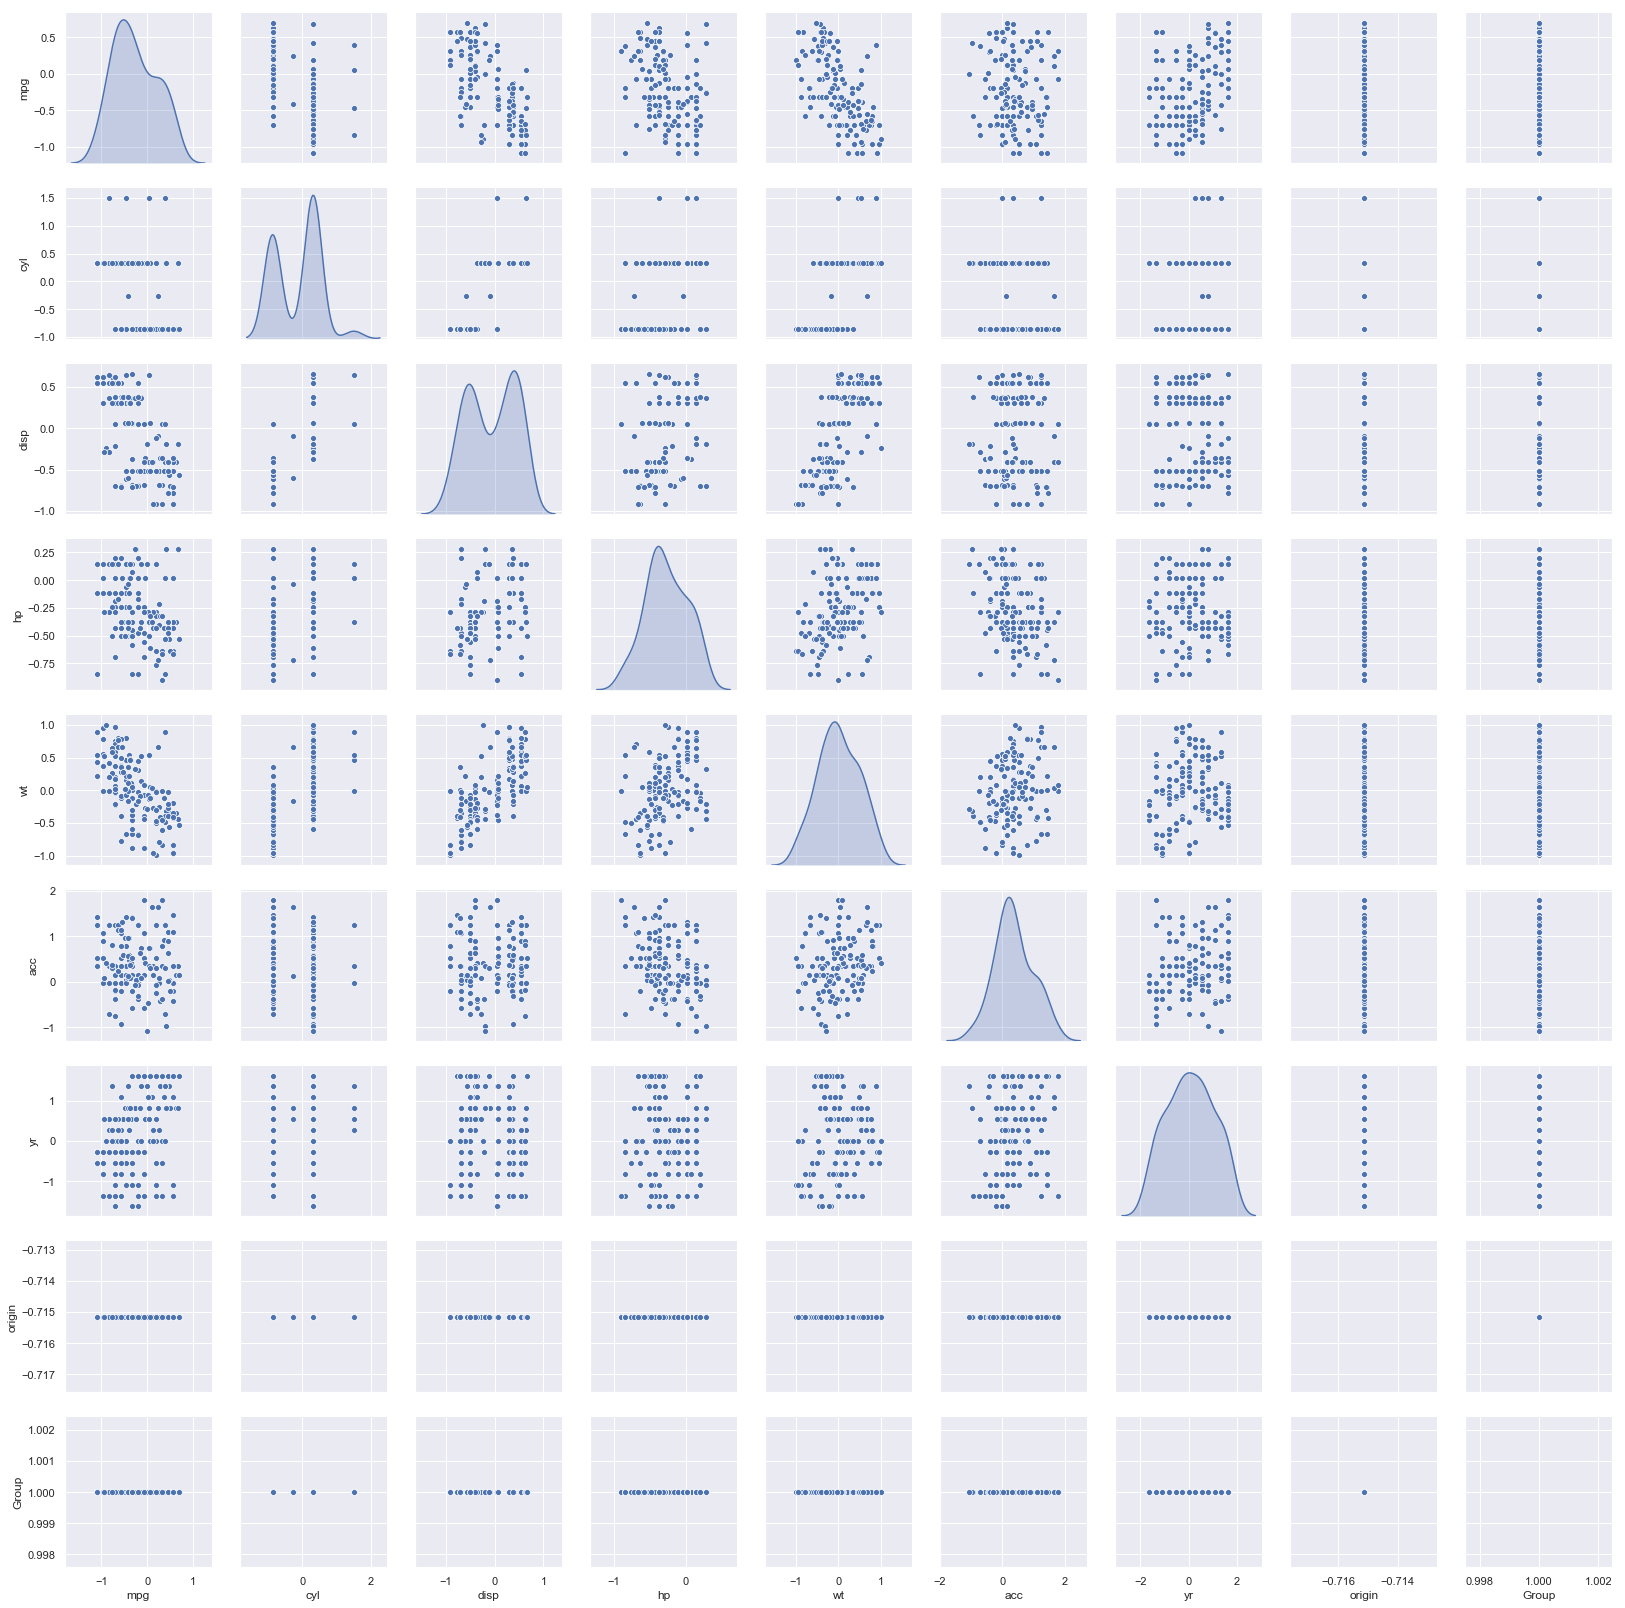

In [152]:
sns.pairplot(Medium_car,diag_kind='kde')

In [168]:
clr = svm.SVR()
array = large_car.values

In [169]:
x = array[:,1:5]
y = array[:,0]

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [171]:
clr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [172]:
y_pred = clr.predict(x_test)

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


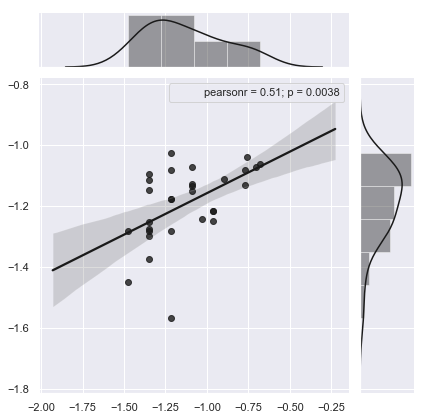

In [173]:
#plotting graph to see model strength
sns.set(style='darkgrid',color_codes=True)
j = sns.jointplot(x=y_test,y=y_pred,kind='reg',color='k')
j.annotate(stats.pearsonr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE683CD0B8>,
      dtype=object)

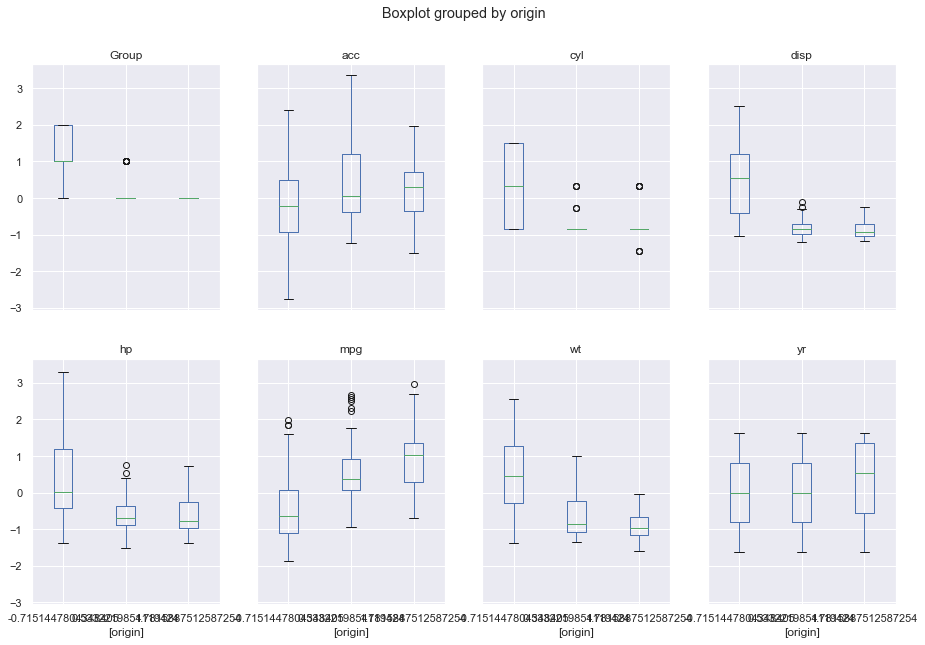

In [174]:
#ALternatively, we can try through origin
auto_df_attr_z.boxplot(by='origin',layout=(2,4),figsize=(15,10))

C:\Users\QD0334\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


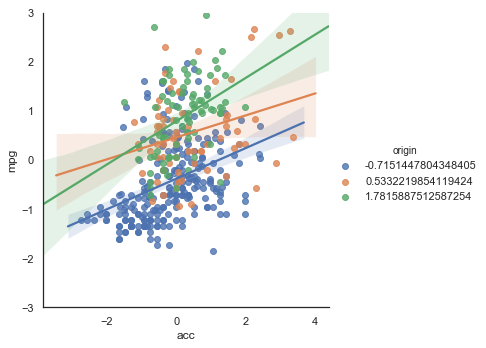

In [179]:
var = 'acc'
with sns.axes_style('white'):
    plot = sns.lmplot(var,'mpg',data = auto_df_attr_z,hue='origin')
    plot.set(ylim = (-3,3))